In [24]:
import torch
from torch.optim import Adam
from torch.nn import Linear, MSELoss, Sequential
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [25]:
df = pd.read_csv('elapsed-time-experimental-group.csv')
df

,vms,elapsed
0,10,19.7
1,20,28.7
2,30,44.3
3,40,69.2
4,40,NaN
5,50,129.7


In [26]:
df = df.dropna() # drop all rows that have NAN/none

In [27]:
df.corr()

,vms,elapsed
vms,1.000000,0.934004
elapsed,0.934004,1.000000


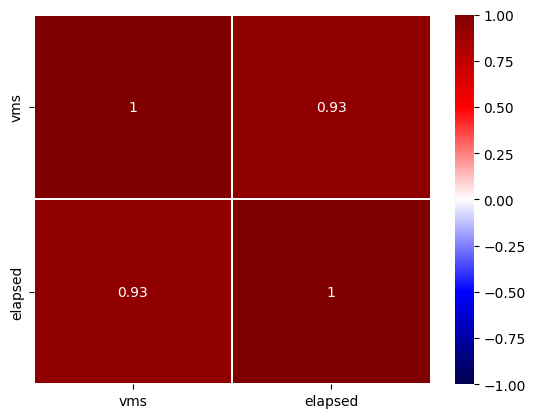

In [29]:
# plt.figure(figsize=(10,10))
sb.heatmap( df.corr(), vmin=-1, vmax=1, annot=True, linewidths=0.2, cmap='seismic' )
plt.show()

In [30]:
x = torch.FloatTensor(df[['vms']].values) # 특성 데이터
y = torch.FloatTensor(df[['elapsed']].values) # 라벨

In [31]:
model = Sequential()
model.add_module('nn1', Linear(1,1))
list(model.parameters())

[Parameter containing:
 tensor([[0.1490]], requires_grad=True),
 Parameter containing:
 tensor([0.1060], requires_grad=True)]

In [12]:
loss_fn = MSELoss()
optimizer = Adam(model.parameters(), lr=0.1)

In [13]:
hist = []
for step in range(1000):
    optimizer.zero_grad()
    hx = model.forward(x) # w*x+b # hx = model(x)
    cost = loss_fn(hx, y)
    cost.backward()
    optimizer.step()
    print(step, cost.item())
    hist.append(cost.item())

0 10321.146484375
1 9650.2451171875
2 9003.2333984375
3 8380.498046875
4 7782.3828125
5 7209.1767578125
6 6661.11474609375
7 6138.3740234375
8 5641.06787109375
9 5169.2431640625
10 4722.87841796875
11 4301.876953125
12 3906.06884765625
13 3535.20703125
14 3188.966552734375
15 2866.9443359375
16 2568.65771484375
17 2293.546875
18 2040.9752197265625
19 1810.2337646484375
20 1600.543212890625
21 1411.058349609375
22 1240.874267578125
23 1089.0311279296875
24 954.5222778320312
25 836.3023681640625
26 733.2947998046875
27 644.4008178710938
28 568.5096435546875
29 504.5077209472656
30 451.2881774902344
31 407.761474609375
32 372.86322021484375
33 345.5641784667969
34 324.8783264160156
35 309.8694763183594
36 299.65838623046875
37 293.427734375
38 290.42608642578125
39 289.97088623046875
40 291.45050048828125
41 294.3238525390625
42 298.12042236328125
43 302.438232421875
44 306.94097900390625
45 311.35504150390625
46 315.4641418457031
47 319.105712890625
48 322.1648864746094
49 324.5693664550

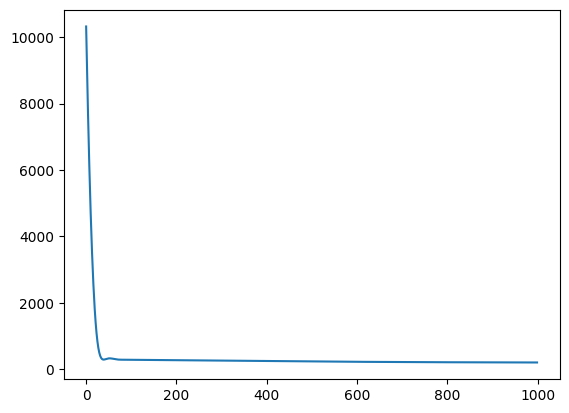

In [14]:
plt.plot(hist)
plt.show()

In [15]:
model[0].weight

Parameter containing:
tensor([[2.4677]], requires_grad=True)

In [16]:
model[0].bias

Parameter containing:
tensor([-14.8248], requires_grad=True)

In [17]:
# model( torch.FloatTensor([[15]]))
pred = model(x).detach().numpy()

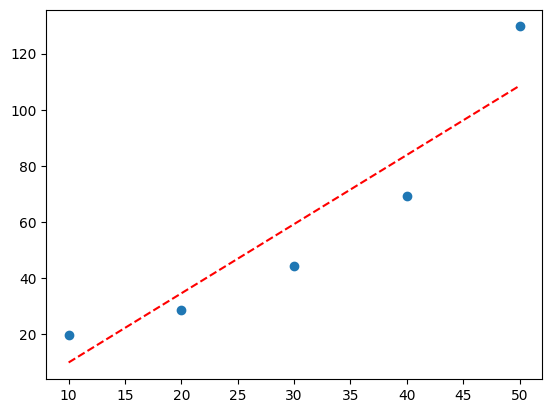

In [18]:
plt.scatter(x, y)
plt.plot(x, pred, 'r--') # r-- : Red, dashed line
plt.show()